<a href="https://colab.research.google.com/github/maggieatugonza-hub/modestmagie/blob/main/PREDICTING_THE_REVENUE_OF_BMW_VEHICHEL_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('BMW sales data (2010-2024).csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
df.shape

(29999, 11)

In [ ]:
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,29999,29999.000000,29999,29999,29999,29999,29999.000000,29999.000000,29999.000000,29999.000000,29999
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,i3,NaN,North America,Grey,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,2792,NaN,5057,5028,7600,15230,NaN,NaN,NaN,NaN,20740
mean,NaN,2016.993833,NaN,NaN,NaN,NaN,3.243795,100618.091836,74942.441548,5089.769392,NaN
std,NaN,4.334249,NaN,NaN,NaN,NaN,1.010664,58049.199728,26001.693651,2861.595449,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50262.500000,52380.000000,2607.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100722.000000,74845.000000,5111.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,151316.000000,97557.500000,7569.000000,NaN


In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 29999 non-null  object 
 1   Year                  29999 non-null  int64  
 2   Region                29999 non-null  object 
 3   Color                 29999 non-null  object 
 4   Fuel_Type             29999 non-null  object 
 5   Transmission          29999 non-null  object 
 6   Engine_Size_L         29999 non-null  float64
 7   Mileage_KM            29999 non-null  int64  
 8   Price_USD             29999 non-null  int64  
 9   Sales_Volume          29999 non-null  int64  
 10  Sales_Classification  29999 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#count duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

In [ ]:
df['Revenue'] = df.get('Revenue', df['Sales_Volume'] * df['Price_USD'])
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [ ]:
#group by region
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
region_revenue

,Revenue
Region,
North America,1937951937915
Europe,1936688055071
Asia,1935797111807
Africa,1888379691412
Middle East,1887496182559
South America,1862150801494


In [ ]:
df['Revenue'] = df['Revenue'].astype(float)

Text(0.5, 1.0, 'Total Revenue vs Region')

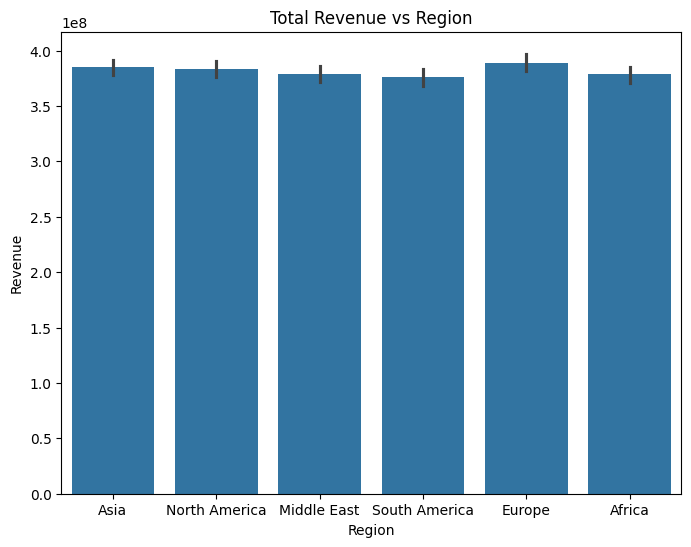

In [ ]:
from matplotlib import axes
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='Region', y='Revenue')
ax.set_title('Total Revenue vs Region')


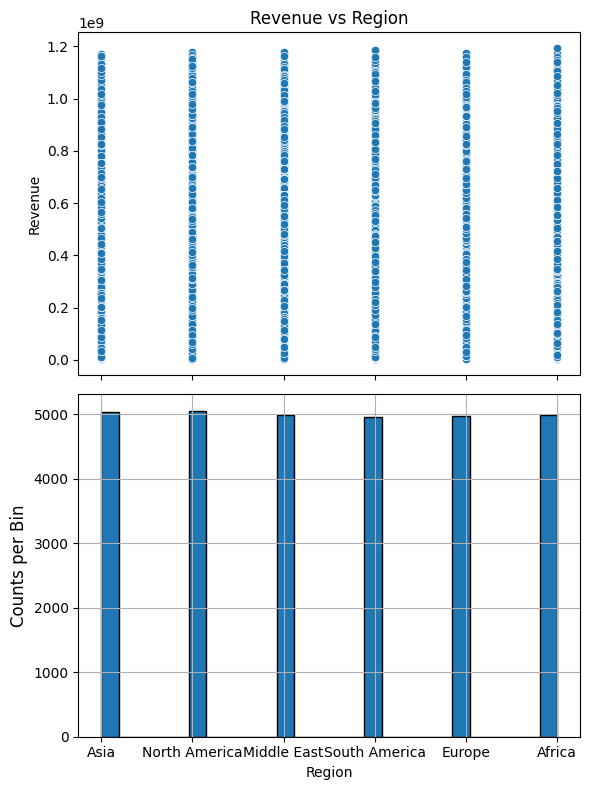

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (6,8), sharex=True)
sns.scatterplot(data=df, x='Region', y='Revenue', ax=axes[0])
axes[0].set_title('Revenue vs Region', fontsize = 12);
axes[0].set_ylabel("Revenue")
axes[0].set_xlabel("Region")
df['Region'].hist(bins='auto', edgecolor='black',ax=axes[1])
axes[1].set_ylabel('Counts per Bin', fontsize = 12);
axes[1].set_xlabel("Region",)
fig.tight_layout()


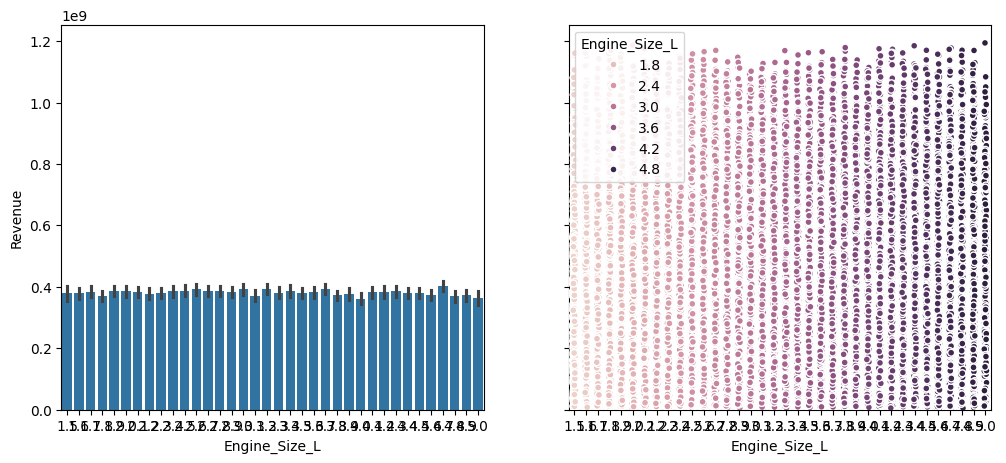

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.barplot(data=df, x='Engine_Size_L', y='Revenue',ax=axes[0]);
sns.stripplot(data=df, x='Engine_Size_L', y='Revenue',ax=axes[1],
                   hue='Engine_Size_L', edgecolor='white', linewidth=1);

In [ ]:
y=df['Sales_Volume']
x=df.drop(columns='Sales_Volume')
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [ ]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification', 'Revenue'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 29999 non-null  object 
 1   Year                  29999 non-null  int64  
 2   Region                29999 non-null  object 
 3   Color                 29999 non-null  object 
 4   Fuel_Type             29999 non-null  object 
 5   Transmission          29999 non-null  object 
 6   Engine_Size_L         29999 non-null  float64
 7   Mileage_KM            29999 non-null  int64  
 8   Price_USD             29999 non-null  int64  
 9   Sales_Volume          29999 non-null  int64  
 10  Sales_Classification  29999 non-null  object 
 11  Revenue               29999 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.7+ MB


In [ ]:
y[5:10]

,Sales_Volume
5,1232
6,7949
7,632
8,8944
9,4411


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size=0.25)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y, test_size=0.15, random_state = 1)

In [ ]:
print(round((len(x_train)/len(x) *100)))
round((len(x_test2)/len(x) *100))

75


25

In [ ]:
y_test3.head(2)
x_train.head(2)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Classification,Revenue
9127,3 Series,2012,South America,Red,Diesel,Manual,4.6,80457,110436,Low,550744332.0
19628,X5,2023,South America,Silver,Electric,Automatic,1.5,101638,81243,Low,272651508.0


In [ ]:
print(x_train.shape )
print(x_test.shape )

(22499, 11)
(7500, 11)


In [ ]:
categorical_cols = x_train.select_dtypes('object').columns
x_train[categorical_cols]

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
9127,3 Series,South America,Red,Diesel,Manual,Low
19628,X5,South America,Silver,Electric,Automatic,Low
15753,3 Series,Middle East,Blue,Hybrid,Manual,Low
987,X3,North America,Red,Diesel,Manual,High
1883,M3,Middle East,Red,Hybrid,Manual,Low
...,...,...,...,...,...,...
1603,X5,Europe,White,Hybrid,Manual,Low
16379,7 Series,South America,Blue,Electric,Automatic,Low
12520,X3,South America,Silver,Diesel,Manual,Low
5699,X5,Asia,Grey,Petrol,Automatic,Low


In [ ]:
ordinal_cols = ['Fuel_Type','Transmission', 'Sales_Classification','Region','Color', 'Model']
ordinal_cols

['Fuel_Type',
 'Transmission',
 'Sales_Classification',
 'Region',
 'Color',
 'Model']

In [ ]:
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Sales_Classification'].unique())
print(df['Region'].unique())
print(df['Color'].unique())
print(df['Model'].unique())

['Petrol' 'Hybrid' 'Diesel' 'Electric']
['Manual' 'Automatic']
['High' 'Low']
['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']
['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']


In [ ]:
numerical_cols = x_train.select_dtypes(include=np.number).columns
categorical_cols = x_train.select_dtypes(include='object').columns

preprocessor = make_column_transformer(
    (StandardScaler(), numerical_cols),
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
)

x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

ohe_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(ohe_feature_names)

x_train_preprocessed_df = pd.DataFrame(x_train_preprocessed, columns=all_feature_names, index=x_train.index)
x_test_preprocessed_df = pd.DataFrame(x_test_preprocessed, columns=all_feature_names, index=x_test.index)

print("Shape of preprocessed x_train:", x_train_preprocessed.shape)
print("Shape of preprocessed x_test:", x_test_preprocessed.shape)
print("\nFirst 5 rows of preprocessed x_train:")
display(x_train_preprocessed_df.head())

Shape of preprocessed x_train: (22499, 36)
Shape of preprocessed x_test: (7500, 36)

First 5 rows of preprocessed x_train:


,Year,Engine_Size_L,Mileage_KM,Price_USD,Revenue,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,...,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Sales_Classification_High,Sales_Classification_Low
9127,-1.150613,1.340767,-0.346879,1.359602,0.640686,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19628,1.384093,-1.724001,0.018071,0.240811,-0.416004,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
15753,-0.689758,1.538494,0.410589,0.333133,-0.065200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
987,-0.689758,-0.241049,0.693713,-1.363238,-0.192882,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1883,0.231954,-0.043322,1.580561,-0.198573,-0.604894,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
model=LinearRegression()
model.fit(x_train_preprocessed, y_train)

LinearRegression()

In [ ]:
prediction=model.predict(x_test_preprocessed)
prediction

array([9418.02255125, 9466.67658348, 4741.77005457, ..., 5026.99900456,
       7004.60374036, 9338.16939592])

In [ ]:
mae=mean_absolute_error(y_test, prediction)
mse=mean_squared_error(y_test, prediction)
rmse=np.sqrt(mse)

In [ ]:
print("Model Performation")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, prediction))

Model Performation
MAE: 679.0094372205908
RMSE: 857.8134985938977
R2 Score: 0.9096936222027362


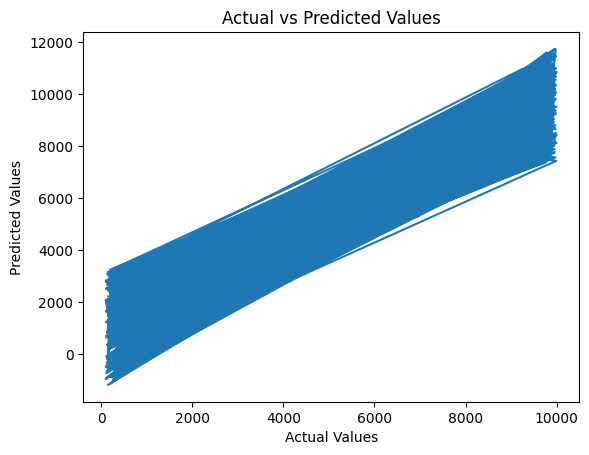

In [ ]:
plt.plot(y_test, prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
# history.history
model = Sequential()
model.add(Dense(18, activation='relu', input_shape=(x_train_preprocessed.shape[1],)))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
history=model.fit(x_train_preprocessed, y_train, epochs=20)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -30197.3730
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -81493.4766
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -81841.9219
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -81343.4141
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: -81243.1719
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -81153.1484
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -80859.4453
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -80862.5391
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -81299.8047
Epoch 10/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -82033.3594
Epoch 11/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -81390.3516
Epoch 12/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -80886.0312
Epoch 13/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -80741.5703
Epoch 14/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

In [ ]:
# history.history

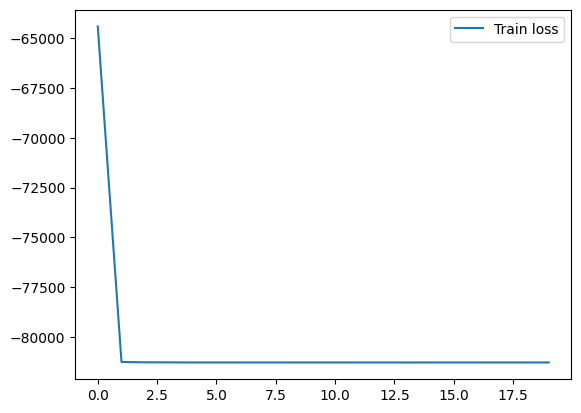

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

In [ ]:
x=0
max(0,x)

0

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 18)             │           666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027 (4.01 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

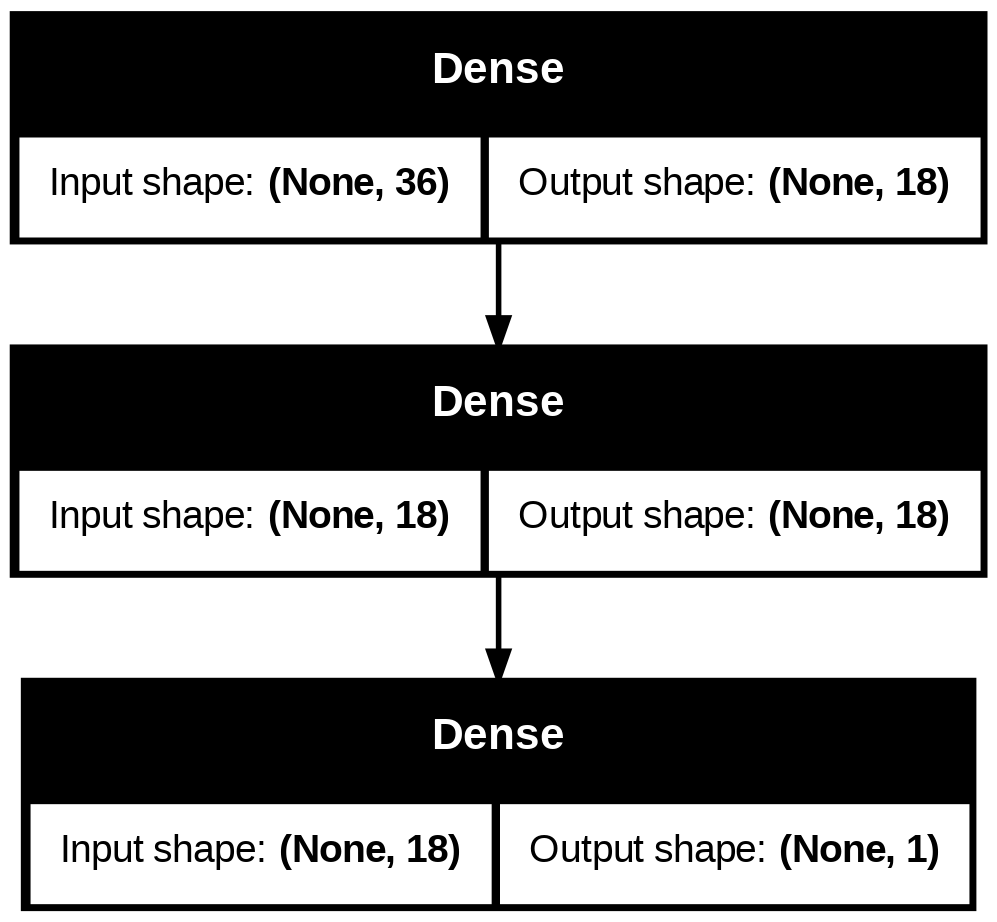

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True, to_file='model.png')